# 합성곱 신경망 1개 적용

In [9]:
# mnist 데이터셋 종속변수 10개
num_classes=10

# mnist 데이터셋의 가로세로 길이는 28 (input image dimensions)
img_rows, img_cols = 28,28

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.shape[0] # 6만장 학습데이터

60000

In [8]:
x_train[0].shape # 하나의 이미지는 28x28 (2차원 데이터)

(28, 28)

2차원 데이터에는 depth(채널)이 생략되어 있음
- (28x28) => (28x28x1) 3차원으로 변경해줘야 함 

In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # 채널=1
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [12]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
x_train[0].shape # 각 이미지는 3차원

(28, 28, 1)

독립변수:
- 이미지 색상 정보를 0 ~ 1 사이의 값으로 정규화 하기

In [15]:
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

종속변수:
- 0 ~ 9까지의 숫자 손글씨 라벨을 원핫벡터로 변환하기

In [17]:
y_train[0]

5

In [18]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

합성곱 신경망 쌓기 
- ```Conv2D``` 에서의 2D는 필터가 가로와 세로 방향으로 움직인다는 것을 의미함
- ```Conv2D(filter 개수, kernel_size=(필터크기 행,열), activation='relu', input_shape=(이미지 한장의 크기(3차원))```
- ```strides=(1,1), padding='valid'```는 기본값 
- ```padding```은 ['valid'|'same'] 선택 가능 
  - 'valid'는 padding 하지 않겠다 (즉, 도출된 activation map 그대로 사용) => activation map 크기: (26,26,1)
  - 'same'은 activation map을 입력된 이미지의 크기와 동일하게 변환하여 반환하겠다 => activation map 크기: (28,28,1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
model_cnn1=Sequential()
model_cnn1.add(Conv2D(32, kernel_size=(3,3), # 필터의 depth는 자동적으로 입력 이미지의 depth
                      activation='relu', input_shape=input_shape)) 
                      # strides=(1,1), padding='valid'는 기본값

2x2 크기의 filter를 사용해서 Max pooling 수행

In [22]:
model_cnn1.add(MaxPooling2D(pool_size=(2,2))) # pooling 필터의 크기
# strides의 기본값은 pool_size와 동일한 값으로 설정됨 (이 경우 strides=2)

Flatten: 3차원 형태의 데이터를 1차원 형태로 변경

In [23]:
model_cnn1.add(Flatten())

마지막으로 ```Dense``` 클래스로 은닉층 하나 쌓고 출력

In [24]:
model_cnn1.add(Dense(128, activation='relu')) # 은닉층 노드 수 결정
model_cnn1.add(Dense(num_classes, activation='softmax')) # 출력노드(종속변수) 개수

model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

모델 학습

In [26]:
from tensorflow.keras import optimizers
model_cnn1.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [28]:
h_cnn1=model_cnn1.fit(x_train, y_train_one_hot, epochs=10,
                      batch_size=128, validation_split=0.2 )

Epoch 1/10
375/375 [==============================] - 26s 68ms/step - loss: 0.2669 - accuracy: 0.9200 - val_loss: 0.0972 - val_accuracy: 0.9737
Epoch 2/10
375/375 [==============================] - 43s 113ms/step - loss: 0.0803 - accuracy: 0.9761 - val_loss: 0.0735 - val_accuracy: 0.9791
Epoch 3/10
375/375 [==============================] - 27s 71ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0633 - val_accuracy: 0.9807
Epoch 4/10
375/375 [==============================] - 23s 63ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0532 - val_accuracy: 0.9848
Epoch 5/10
375/375 [==============================] - 35s 93ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0559 - val_accuracy: 0.9854
Epoch 6/10
375/375 [==============================] - 26s 70ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0583 - val_accuracy: 0.9844
Epoch 7/10
375/375 [==============================] - 24s 63ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0569 - val_accuracy

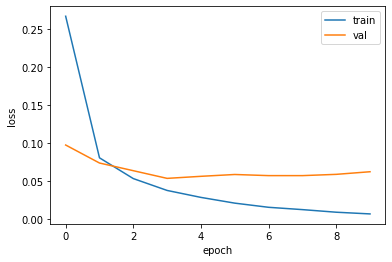

In [29]:
import matplotlib.pyplot as plt

plt.plot(h_cnn1.history['loss'])
plt.plot(h_cnn1.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

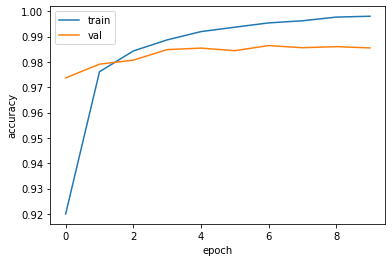

In [30]:
plt.plot(h_cnn1.history['accuracy'])
plt.plot(h_cnn1.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

모델 평가

In [31]:
test_loss, test_acc = model_cnn1.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0532 - accuracy: 0.9862
test_acc: 0.9861999750137329


In [36]:
x_test[0].shape

(28, 28, 1)

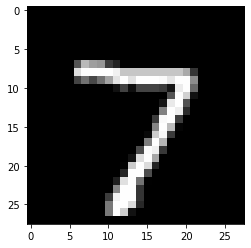

In [37]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

In [39]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction=model_cnn1.predict(x_test[0:1]) # test data 첫번째 이미지 
prediction

array([[0.          , 0.0000000001, 0.0000000006, 0.0000000056,
        0.          , 0.          , 0.          , 1.          ,
        0.0000000001, 0.000000001 ]], dtype=float32)

In [40]:
y_test[0]

7

In [41]:
labels = list(range(10))
print(labels[np.argmax(prediction)])

7


# 합성곱 신경망 2개 적용

신경망 쌓기

In [43]:
model_cnn2=Sequential()
model_cnn2.add(Conv2D(32, (3,3), # 필터의 depth는 자동적으로 입력 이미지의 depth
                      activation='relu', input_shape=input_shape))
model_cnn2.add(MaxPooling2D(pool_size=(2,2)))
model_cnn2.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model_cnn2.add(MaxPooling2D((2,2))) # AveragePooling2D도 가능

In [44]:
model_cnn2.add(Flatten())
model_cnn2.add(Dense(64, activation='relu')) # 은닉층 노드 수 64개
model_cnn2.add(Dense(10, activation='softmax')) # 종속변수 10개

model_cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

모델 학습 

In [45]:
from tensorflow.keras import optimizers
model_cnn2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [46]:
h_cnn2=model_cnn2.fit(x_train, y_train_one_hot, epochs=5,
                      batch_size=64, validation_split=0.2 )

Epoch 1/5
750/750 [==============================] - 106s 140ms/step - loss: 0.1627 - accuracy: 0.9497 - val_loss: 0.0525 - val_accuracy: 0.9849
Epoch 2/5
750/750 [==============================] - 101s 134ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 3/5
750/750 [==============================] - 98s 130ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0383 - val_accuracy: 0.9884
Epoch 4/5
750/750 [==============================] - 98s 131ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0369 - val_accuracy: 0.9894
Epoch 5/5
750/750 [==============================] - 101s 134ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0414 - val_accuracy: 0.9886


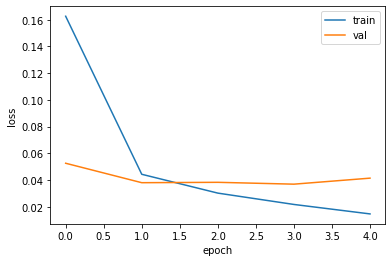

In [47]:
plt.plot(h_cnn2.history['loss'])
plt.plot(h_cnn2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

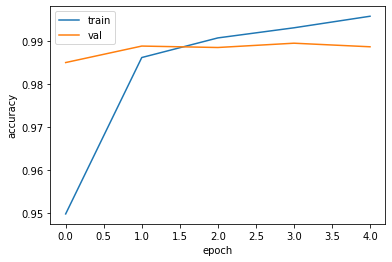

In [48]:
plt.plot(h_cnn2.history['accuracy'])
plt.plot(h_cnn2.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

모델 평가

In [49]:
test_loss, test_acc = model_cnn2.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0317 - accuracy: 0.9907
test_acc: 0.9907000064849854
